In [67]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(rc={"figure.figsize": (8, 6)})

    Import cleaned grit data

In [68]:
df_400 = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=0)
df_500 = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=1)
df_800 = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=2)
df_pl = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=3)


In [69]:
df_pl.head()

,Sample #,dry (g),suspended (g),saturated (g),density (g/cc),open pore volume,open porosity (%),dry (g).1,suspended (g).1,saturated (g).1,density (g/cc).1,open pore volume.1,open porosity (%).1,Increase in weight (%),Increase in Density (%),Wt % Sulfur
0,4-O-1,3.2670,2.3559,4.3146,1.667943,1.0476,53.484454,5.2989,3.3855,5.3640,2.678241,0.0651,0.032904,0.621947,0.605715,0.383457
1,4-C-1,3.6166,2.5925,4.6988,1.717039,1.0822,51.379196,5.5057,3.5796,5.6146,2.705504,0.1089,0.053514,0.522341,0.575679,0.343117
2,4-O-2,3.4031,2.4879,4.4872,1.702146,1.0841,54.223978,5.4346,3.5060,5.5171,2.702302,0.0825,0.041022,0.596956,0.587586,0.373809
3,4-C-2,3.5314,2.4360,4.4020,1.796236,0.8706,44.282808,5.2738,3.4096,5.4075,2.639672,0.1337,0.066920,0.493402,0.469557,0.330388
4,5-O-1,3.3905,2.4801,4.5049,1.674486,1.1144,55.037535,5.4740,3.5019,5.5647,2.653675,0.0907,0.043969,0.614511,0.584769,0.380617


In [70]:
list(df_400)

['Sample #',
 'Trial',
 'dry (g)',
 'suspended (g)',
 'saturated (g)',
 'density (g/cc)',
 'open pore volume',
 'open porosity (%)',
 'dry (g).1',
 'suspended (g).1',
 'saturated (g).1',
 'density (g/cc).1',
 'open pore volume.1',
 'open porosity (%).1',
 'Increase in weight (%)',
 'Increase in Density (%)',
 'Wt % Sulfur']

In [71]:
# Rename specific column names for untreated and treated

df_400.rename(columns = {'dry (g)':'dry (g)-untreated',
                         'suspended (g)':'suspended (g)-untreated',
                         'saturated (g)':'saturated (g)-untreated',
                         'density (g/cc)':'density (g/cc)-untreated',
                         'open pore volume':'open pore volume-untreated',
                         'open porosity (%)':'open porosity (%)-untreated',
                         'dry (g).1':'dry (g)-treated',
                         'suspended (g).1':'suspended (g)-treated',
                         'saturated (g).1':'saturated (g)-treated',
                         'density (g/cc).1':'density (g/cc)-treated',
                         'open pore volume.1':'open pore volume-treated',
                         'open porosity (%).1':'open porosity (%)-treated'

                         }, inplace = True)

df_500.rename(columns = {'dry (g)':'dry (g)-untreated',
                         'suspended (g)':'suspended (g)-untreated',
                         'saturated (g)':'saturated (g)-untreated',
                         'density (g/cc)':'density (g/cc)-untreated',
                         'open pore volume':'open pore volume-untreated',
                         'open porosity (%)':'open porosity (%)-untreated',
                         'dry (g).1':'dry (g)-treated',
                         'suspended (g).1':'suspended (g)-treated',
                         'saturated (g).1':'saturated (g)-treated',
                         'density (g/cc).1':'density (g/cc)-treated',
                         'open pore volume.1':'open pore volume-treated',
                         'open porosity (%).1':'open porosity (%)-treated'


                         }, inplace = True)

df_800.rename(columns = {'dry (g)':'dry (g)-untreated',
                         'suspended (g)':'suspended (g)-untreated',
                         'saturated (g)':'saturated (g)-untreated',
                         'density (g/cc)':'density (g/cc)-untreated',
                         'open pore volume':'open pore volume-untreated',
                         'open porosity (%)':'open porosity (%)-untreated',
                         'dry (g).1':'dry (g)-treated',
                         'suspended (g).1':'suspended (g)-treated',
                         'saturated (g).1':'saturated (g)-treated',
                         'density (g/cc).1':'density (g/cc)-treated',
                         'open pore volume.1':'open pore volume-treated',
                         'open porosity (%).1':'open porosity (%)-treated'


                         }, inplace = True)                         

df_pl.rename(columns = {'dry (g)':'dry (g)-untreated',
                         'suspended (g)':'suspended (g)-untreated',
                         'saturated (g)':'saturated (g)-untreated',
                         'density (g/cc)':'density (g/cc)-untreated',
                         'open pore volume':'open pore volume-untreated',
                         'open porosity (%)':'open porosity (%)-untreated',
                         'dry (g).1':'dry (g)-treated',
                         'suspended (g).1':'suspended (g)-treated',
                         'saturated (g).1':'saturated (g)-treated',
                         'density (g/cc).1':'density (g/cc)-treated',
                         'open pore volume.1':'open pore volume-treated',
                         'open porosity (%).1':'open porosity (%)-treated'


                         }, inplace = True)                         

In [72]:
df_400['Test'] = 'R&D'
df_500['Test'] = 'R&D'
df_800['Test'] = 'R&D'
df_pl['Test'] = 'Plant'

In [73]:
df_400_pl = df_pl.loc[df_pl['Sample #'].str.startswith('4')]
df_500_pl = df_pl.loc[df_pl['Sample #'].str.startswith('5')]
df_800_pl = df_pl.loc[df_pl['Sample #'].str.startswith('8')]

In [74]:
df_4 = pd.concat([df_400, df_400_pl], axis=0)
df_5 = pd.concat([df_500, df_500_pl], axis=0)
df_8 = pd.concat([df_800, df_800_pl], axis=0)

In [75]:
df_5.dtypes

Sample #                        object
Trial                           object
dry (g)-untreated              float64
suspended (g)-untreated        float64
saturated (g)-untreated        float64
density (g/cc)-untreated       float64
open pore volume-untreated     float64
open porosity (%)-untreated    float64
dry (g)-treated                float64
suspended (g)-treated          float64
saturated (g)-treated          float64
density (g/cc)-treated         float64
open pore volume-treated       float64
open porosity (%)-treated      float64
Increase in weight (%)         float64
Increase in Density (%)        float64
Wt % Sulfur                    float64
Test                            object
dtype: object

    Test for variance and sample differences

In [76]:
print(df_400['Wt % Sulfur'].var(), df_400['Wt % Sulfur'].mean(), df_400['Wt % Sulfur'].std())
print(df_400_pl['Wt % Sulfur'].var(), df_400_pl['Wt % Sulfur'].mean(), df_400_pl['Wt % Sulfur'].std())

0.00018016823376928437 0.3866040412391684 0.013422676103120583
0.0006271711413658917 0.3576926481421037 0.025043385181837772


In [77]:
print(df_500['Wt % Sulfur'].var(), df_500['Wt % Sulfur'].mean(), df_500['Wt % Sulfur'].std())
print(df_500_pl['Wt % Sulfur'].var(), df_500_pl['Wt % Sulfur'].mean(), df_500_pl['Wt % Sulfur'].std())

0.00047692270811416476 0.37029969948217295 0.02183856011998421
1.3126012536358693e-05 0.37599078791677376 0.0036229839271460606


In [78]:
print(df_800['Wt % Sulfur'].var(), df_800['Wt % Sulfur'].mean(), df_800['Wt % Sulfur'].std())
print(df_800_pl['Wt % Sulfur'].var(), df_800_pl['Wt % Sulfur'].mean(), df_800_pl['Wt % Sulfur'].std())

0.00010210460171003723 0.39301659582624143 0.010104682167690246
0.00024984611065130254 0.3919568993362452 0.015806521143227645


In [98]:
print(stats.levene(df_400['Wt % Sulfur'],
             df_400_pl['Wt % Sulfur'],
             center= 'median'))

print(stats.levene(df_500['Wt % Sulfur'],
             df_500_pl['Wt % Sulfur'],
             center= 'median'))

print(stats.levene(df_800['Wt % Sulfur'],
             df_800_pl['Wt % Sulfur'],
             center= 'median'))           

LeveneResult(statistic=6.110316705133453, pvalue=0.02030536562322485)
LeveneResult(statistic=1.4460046965721327, pvalue=0.23560148798001054)
LeveneResult(statistic=5.495461024767465, pvalue=0.047102889651316725)


    Variances are not homogenous for 400 and 800 grit sizes

In [80]:
#perform independent two sample t-test

print(ttest_ind(df_400['Wt % Sulfur'], df_400_pl['Wt % Sulfur'],equal_var=False))
print(ttest_ind(df_500['Wt % Sulfur'], df_500_pl['Wt % Sulfur'],equal_var=True))
print(ttest_ind(df_800['Wt % Sulfur'], df_800_pl['Wt % Sulfur'],equal_var=False))

print("-----------------------")
print(ttest_ind(df_400['Wt % Sulfur'], df_500['Wt % Sulfur'],equal_var=False))
print(ttest_ind(df_400['Wt % Sulfur'], df_800['Wt % Sulfur'],equal_var=False))
print(ttest_ind(df_800['Wt % Sulfur'], df_500['Wt % Sulfur'],equal_var=False))

print("-----------------------")
print(ttest_ind(df_400_pl['Wt % Sulfur'], df_500_pl['Wt % Sulfur'],equal_var=False))
print(ttest_ind(df_500_pl['Wt % Sulfur'], df_800_pl['Wt % Sulfur'],equal_var=True))
print(ttest_ind(df_400_pl['Wt % Sulfur'], df_800_pl['Wt % Sulfur'],equal_var=False))

Ttest_indResult(statistic=2.2555398673665112, pvalue=0.1014651154017822)
Ttest_indResult(statistic=-0.5154002337186405, pvalue=0.608853368388552)
Ttest_indResult(statistic=0.11886538586386797, pvalue=0.9103441526891822)
-----------------------
Ttest_indResult(statistic=3.754099717746093, pvalue=0.0003792777700378056)
Ttest_indResult(statistic=-1.2948858815504793, pvalue=0.2245625781284387)
Ttest_indResult(statistic=4.264797219320229, pvalue=0.0008939347866538645)
-----------------------
Ttest_indResult(statistic=-1.4462592535304268, pvalue=0.24039067032625414)
Ttest_indResult(statistic=-1.9691295745263673, pvalue=0.09646654314352097)
Ttest_indResult(statistic=-2.3140203431818653, pvalue=0.06791628602683523)


    Significant difference observed in 400 grit size

<AxesSubplot: xlabel='Wt % Sulfur', ylabel='Density'>

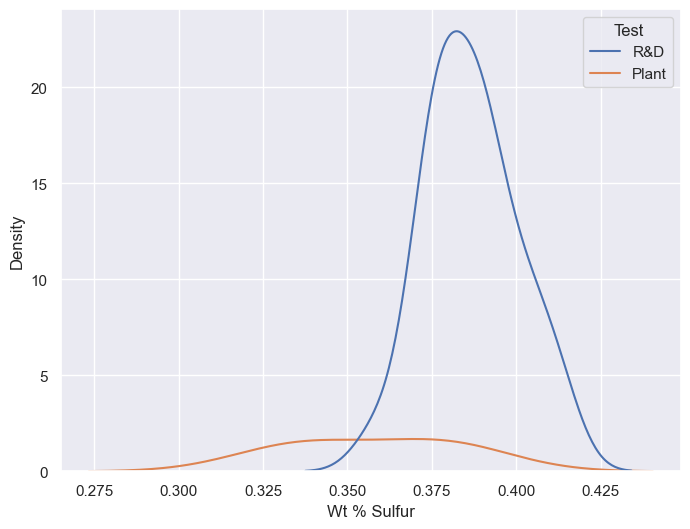

In [81]:
sns.kdeplot(data=df_4, x="Wt % Sulfur", hue="Test")

<AxesSubplot: xlabel='Wt % Sulfur', ylabel='Density'>

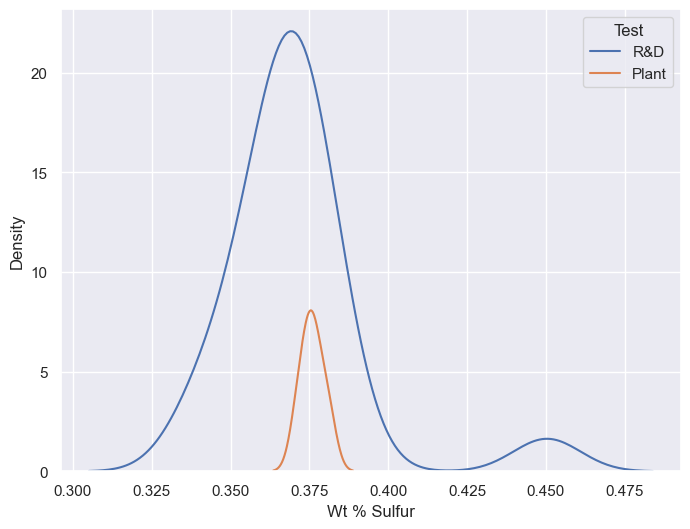

In [82]:
sns.kdeplot(data=df_5, x="Wt % Sulfur", hue="Test")

<AxesSubplot: xlabel='Wt % Sulfur', ylabel='Density'>

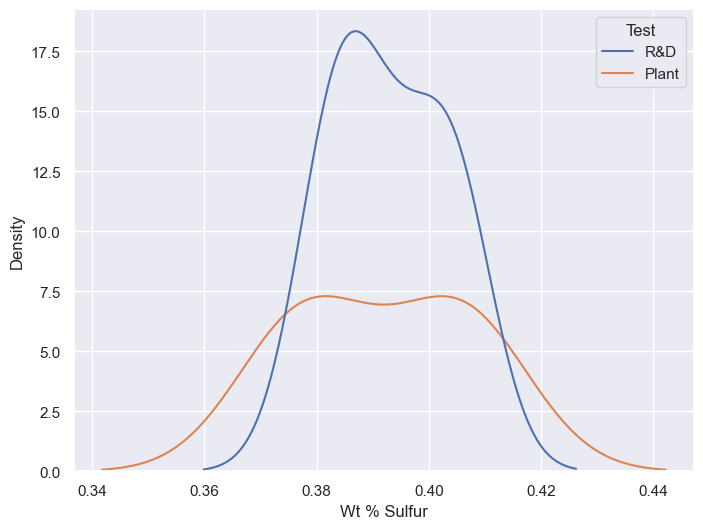

In [83]:
sns.kdeplot(data=df_8, x="Wt % Sulfur", hue="Test")

In [84]:
df_400.head()

,Sample #,Trial,dry (g)-untreated,suspended (g)-untreated,saturated (g)-untreated,density (g/cc)-untreated,open pore volume-untreated,open porosity (%)-untreated,dry (g)-treated,suspended (g)-treated,saturated (g)-treated,density (g/cc)-treated,open pore volume-treated,open porosity (%)-treated,Increase in weight (%),Increase in Density (%),Wt % Sulfur,Test
0,4-O-10,7 - M,3.4920,2.5754,4.5731,1.748010,1.0811,0.541172,5.6248,3.6556,5.7336,2.706833,0.1088,0.052358,0.610767,0.548523,0.379178,R&D
1,4-C-10,7 - M,3.6013,2.6560,4.6694,1.788666,1.0681,0.530496,5.6170,3.6742,5.7227,2.742006,0.1057,0.051599,0.559715,0.532990,0.358857,R&D
2,4-O-11,1 - M,3.3890,2.4609,4.4514,1.702587,1.0624,0.533735,5.4400,3.5332,5.5914,2.643086,0.1514,0.073559,0.605193,0.552394,0.377022,R&D
3,4-O-12,1 - M,3.2866,2.3983,4.3746,1.663007,1.0880,0.550524,5.3844,3.4796,5.5305,2.625384,0.1461,0.071237,0.638289,0.578697,0.389607,R&D
4,4-O-17,1 - M,3.4578,2.5285,4.5079,1.746893,1.0501,0.530514,5.5107,3.5811,5.6341,2.684218,0.1234,0.060107,0.593701,0.536567,0.372530,R&D


In [85]:
df = pd.concat([df_4, df_8],axis=0)
df['Sample #'] = df['Sample #'].apply(lambda x: '400' if x.startswith('4') else x)
df['Sample #'] = df['Sample #'].apply(lambda x: '500' if x.startswith('5') else x)
df['Sample #'] = df['Sample #'].apply(lambda x: '800' if x.startswith('8') else x)

df.head()

,Sample #,Trial,dry (g)-untreated,suspended (g)-untreated,saturated (g)-untreated,density (g/cc)-untreated,open pore volume-untreated,open porosity (%)-untreated,dry (g)-treated,suspended (g)-treated,saturated (g)-treated,density (g/cc)-treated,open pore volume-treated,open porosity (%)-treated,Increase in weight (%),Increase in Density (%),Wt % Sulfur,Test
0,400,7 - M,3.4920,2.5754,4.5731,1.748010,1.0811,0.541172,5.6248,3.6556,5.7336,2.706833,0.1088,0.052358,0.610767,0.548523,0.379178,R&D
1,400,7 - M,3.6013,2.6560,4.6694,1.788666,1.0681,0.530496,5.6170,3.6742,5.7227,2.742006,0.1057,0.051599,0.559715,0.532990,0.358857,R&D
2,400,1 - M,3.3890,2.4609,4.4514,1.702587,1.0624,0.533735,5.4400,3.5332,5.5914,2.643086,0.1514,0.073559,0.605193,0.552394,0.377022,R&D
3,400,1 - M,3.2866,2.3983,4.3746,1.663007,1.0880,0.550524,5.3844,3.4796,5.5305,2.625384,0.1461,0.071237,0.638289,0.578697,0.389607,R&D
4,400,1 - M,3.4578,2.5285,4.5079,1.746893,1.0501,0.530514,5.5107,3.5811,5.6341,2.684218,0.1234,0.060107,0.593701,0.536567,0.372530,R&D


In [86]:
list(df)

['Sample #',
 'Trial',
 'dry (g)-untreated',
 'suspended (g)-untreated',
 'saturated (g)-untreated',
 'density (g/cc)-untreated',
 'open pore volume-untreated',
 'open porosity (%)-untreated',
 'dry (g)-treated',
 'suspended (g)-treated',
 'saturated (g)-treated',
 'density (g/cc)-treated',
 'open pore volume-treated',
 'open porosity (%)-treated',
 'Increase in weight (%)',
 'Increase in Density (%)',
 'Wt % Sulfur',
 'Test']

<AxesSubplot: >

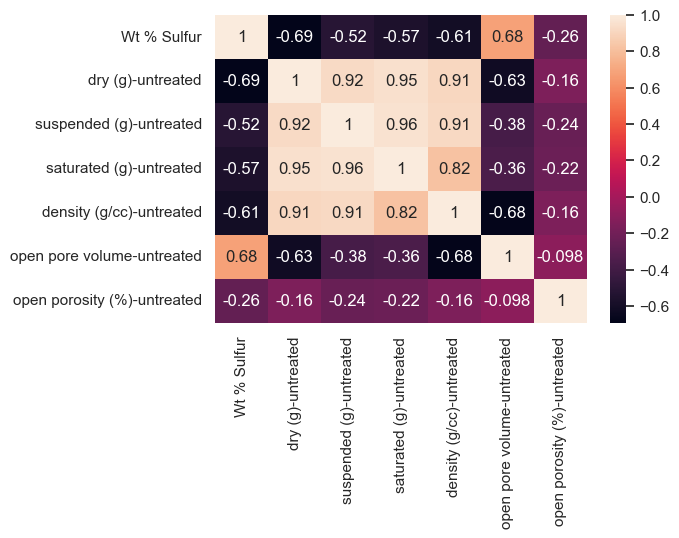

In [87]:
plt.figure(figsize=(6,4))

sns.heatmap(df[[    
            'Wt % Sulfur',
            'dry (g)-untreated',
            'suspended (g)-untreated',
            'saturated (g)-untreated',
            'density (g/cc)-untreated',
            'open pore volume-untreated',
            'open porosity (%)-untreated']].corr(), annot=True)

    Identify drivers of sulphur weight

In [88]:
df.drop(columns=['Trial'], inplace = True)

obj_cols = df.select_dtypes(include=[object])

for i in obj_cols:
    df[i+'label'] = preprocessing.LabelEncoder().fit_transform(df[i])

In [89]:
list(df)

['Sample #',
 'dry (g)-untreated',
 'suspended (g)-untreated',
 'saturated (g)-untreated',
 'density (g/cc)-untreated',
 'open pore volume-untreated',
 'open porosity (%)-untreated',
 'dry (g)-treated',
 'suspended (g)-treated',
 'saturated (g)-treated',
 'density (g/cc)-treated',
 'open pore volume-treated',
 'open porosity (%)-treated',
 'Increase in weight (%)',
 'Increase in Density (%)',
 'Wt % Sulfur',
 'Test',
 'Sample #label',
 'Testlabel']

In [90]:
X = df[['dry (g)-untreated',
 #'suspended (g)-untreated',
 #'saturated (g)-untreated',
 'density (g/cc)-untreated',
 'open pore volume-untreated',
 'open porosity (%)-untreated',
 'Sample #label',
 'Testlabel'
          ]]

Y = df['Wt % Sulfur']

In [91]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [92]:
result = sm.OLS(Y, X).fit()
 
# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:            Wt % Sulfur   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              7683.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                    4.40e-49
Time:                        09:35:14   Log-Likelihood:                          120.50
No. Observations:                  38   AIC:                                     -229.0
Df Residuals:                      32   BIC:                                     -219.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

C:\Users\L7927301\AppData\Local\Temp\ipykernel_77084\3173568050.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


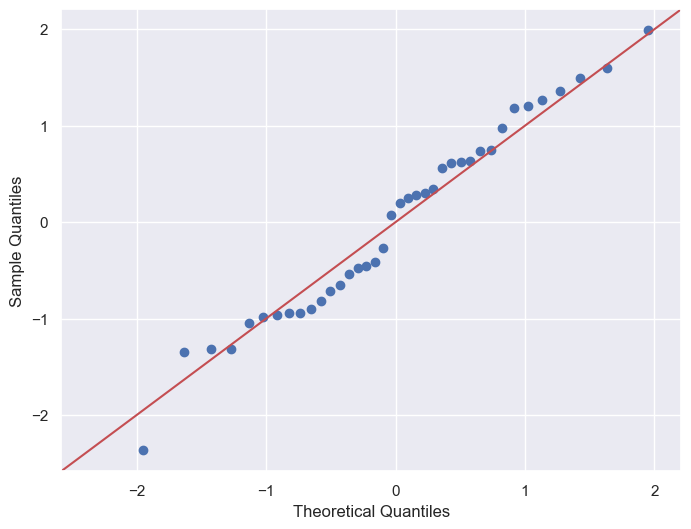

In [93]:
import scipy.stats as stats
residuals = result.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [97]:
forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(x_train, y_train)
forest_reg.fit(x_train, y_train)

print('R squared train": %.4f' % forest_reg.score(x_train, y_train))
print('R squared test": %.4f' % forest_reg.score(x_test, y_test))

y_pred = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

R squared train": 0.8704
R squared test": 0.3036
Random Forest RMSE: 0.0163


Text(0.5, 0, 'Random Forest Feature Importance')

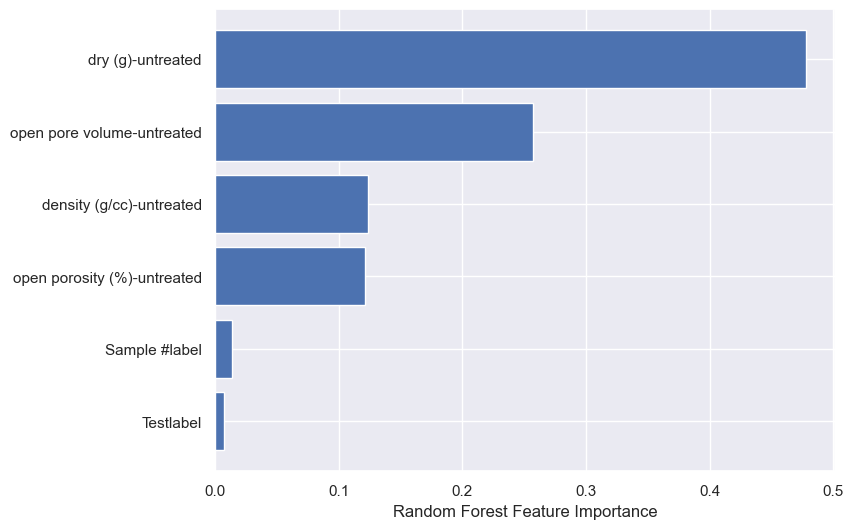

In [96]:
sorted_idx = forest_reg.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], forest_reg.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")